In [53]:
import pandas as pd
import numpy as np
from keras.layers import Dropout, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('clean-data/Whiskey_data/Whiskey_Advocate_All_scraped_KHupdate-23 Jul (Team Style Defined) with descriptions.csv')

In [7]:
categories = ['Single Malt Scotch',
                  'Flavored Whiskey and Liqueurs',
                  'Bourbon',
                  ' Blended Malt Scotch Whisky ',
                  'Blended Scotch Whisky',
                  'Blended Whiskey (Multi-country)',
                  ' Single Malt Whisky (Multi-country)',
                  ' Single Grain Whisky (Multi-country)',
                  'Japan',
                  ' Canada',
                  'Irish',
                  'Generic Whisky (Multi-country)',
                  'Rye Whisky',
                  'White Whisky',
                  'Craft Whisky']

In [25]:
y = df[categories]
X = df['descriptions'].values

In [30]:
vectorizer = TfidfVectorizer(stop_words = stop_words, max_features=500)

In [40]:
X = vectorizer.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(3544, 500)

In [46]:
model.add(Dense(500, input_dim=500))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
epochs = 20
batch_size = 254
model.summary()

W0801 12:20:21.206802  8220 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 15)                7515      
_________________________________________________________________
dense_7 (Dense)              (None, 500)               8000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                7515      
Total params: 273,530
Trainable params: 273,530
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.4,
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)],
                        verbose = 1)

Train on 2126 samples, validate on 1418 samples
Epoch 1/20
2126/2126 [==============================] - 0s 214us/step - loss: 2.6334 - acc: 0.3137 - val_loss: 2.4932 - val_acc: 0.4231
Epoch 2/20
2126/2126 [==============================] - 0s 41us/step - loss: 2.4014 - acc: 0.4102 - val_loss: 2.2245 - val_acc: 0.4231
Epoch 3/20
2126/2126 [==============================] - 0s 50us/step - loss: 2.1602 - acc: 0.4102 - val_loss: 2.0453 - val_acc: 0.4231
Epoch 4/20
2126/2126 [==============================] - 0s 48us/step - loss: 2.0790 - acc: 0.4102 - val_loss: 2.0040 - val_acc: 0.4231
Epoch 5/20
2126/2126 [==============================] - 0s 42us/step - loss: 2.0150 - acc: 0.4102 - val_loss: 1.9503 - val_acc: 0.4231
Epoch 6/20
2126/2126 [==============================] - 0s 42us/step - loss: 1.9442 - acc: 0.4102 - val_loss: 1.8620 - val_acc: 0.4231
Epoch 7/20
2126/2126 [==============================] - 0s 47us/step - loss: 1.8525 - acc: 0.4102 - val_loss: 1.7709 - val_acc: 0.4231
Epoch 

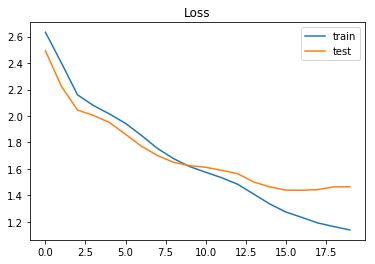

In [54]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

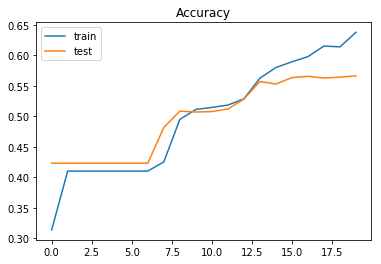

In [55]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()